In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import and Encode Data

In [2]:
df = pd.read_csv("bank_data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
1,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
2,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
3,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
4,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes


In [3]:
X = df.iloc[:,:16]
y = df.iloc[:,16:]

In [4]:
X = pd.get_dummies(X)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
y = LabelEncoder().fit_transform(np.ravel(y))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

# Logistic Regression (Part A)

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Full Model

In [11]:
full_mod = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()

In [12]:
full_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      790
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -331.47
Date:                Wed, 07 Dec 2022   Deviance:                       662.94
Time:                        19:57:15   Pearson chi2:                 7.26e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4459
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1655      0.244      0.677      0.498      -0.313       0.644
age                    -0.0103      0.013     -0.783      0.433      -0.036       0.015
balance             -2.084e-05   3.45e-05     -0.604      0.546   -8.84e-05    4.68e-05
day                     0.0152      0.014      1.113      0.266      -0.012       0.042
duration                0.0052      0.000     11.794      0.000       0.004       0.006
campaign               -0.1316      0.057     -2.308      0.021      -0.243      -0.020
pdays                  -0.0022      0.002     -1.102      0.270      -0.006       0.002
previous               -0.1213      0.098     -1.234      0.217      -0.314       0.071
job_admin.              0.4162      0.339      1.229      0.219      -0.247       1.080
job_blue-collar        -0.6601      0.292     -2.260      0.024      -1.233      -0.088
job_entrepreneur        0.6350      0.551      1.153      0.249      -0.444       1.714
job_housemaid          -0.1666      0.524     -0.318      0.751      -1.194       0.861
job_management          0.0982      0.290      0.338      0.735      -0.471       0.667
job_retired             0.7708      0.428      1.800      0.072      -0.068       1.610
job_self-employed      -0.2479      0.472     -0.525      0.600      -1.173       0.678
job_services           -0.5307      0.382     -1.390      0.165      -1.279       0.218
job_student             0.3052      0.575      0.531      0.595      -0.821       1.432
job_technician         -0.1292      0.271     -0.476      0.634      -0.661       0.403
job_unemployed         -1.9232      0.721     -2.668      0.008      -3.336      -0.510
job_unknown             1.5979      0.931      1.716      0.086      -0.227       3.423
marital_divorced        0.3131      0.245      1.277      0.201      -0.167       0.794
marital_married        -0.0683      0.168     -0.406      0.684      -0.398       0.261
marital_single         -0.0794      0.189     -0.420      0.675      -0.450       0.291
education_primary       0.1468      0.291      0.505      0.614      -0.423       0.717
education_secondary     0.0224      0.215      0.104      0.917      -0.400       0.445
education_tertiary      0.2311      0.254      0.910      0.363      -0.266       0.729
education_unknown      -0.2349      0.481     -0.488      0.625      -1.178       0.708
default_no             -0.3974      0.424     -0.938      0.348      -1.228       0.433
default_yes             0.5629      0.526      1.071      0.284      -0.467       1.593
housing_no              0.2367      0.166      1.428      0.153      -0.088       0.562
housing_yes            -0.0712      0.169     -0.420      0.674      -0.403       0.261
loan_no                 0.5321      0.209      2.546      0.011       0.123       0.942
loa

## Intermediate Models

### 1

In [13]:
X_train_i = X_train.copy()
X_test_i = X_test.copy()
for column in X_train_i.columns:
    if full_mod.pvalues.loc[column] > 0.38:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [14]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [15]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      800
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -332.92
Date:                Wed, 07 Dec 2022   Deviance:                       665.83
Time:                        19:57:16   Pearson chi2:                 7.54e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4440
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3170      0.487     -0.651      0.515      -1.272       0.638
day                    0.0151      0.013      1.157      0.247      -0.010       0.041
duration               0.0052      0.000     11.869      0.000       0.004       0.006
campaign              -0.1327      0.056     -2.354      0.019      -0.243      -0.022
pdays                 -0.0021      0.002     -1.093      0.274      -0.006       0.002
previous              -0.1214      0.099     -1.229      0.219      -0.315       0.072
job_admin.             0.4899      0.356      1.374      0.169      -0.209       1.188
job_blue-collar       -0.5739      0.322     -1.784      0.074      -1.204       0.056
job_entrepreneur       0.7023      0.593      1.185      0.236      -0.460       1.864
job_retired            0.6140      0.388      1.581      0.114      -0.147       1.375
job_services          -0.4580      0.411     -1.114      0.265      -1.264       0.348
job_unemployed        -1.8594      0.776     -2.395      0.017      -3.381      -0.338
job_unknown            1.3621      0.963      1.415      0.157      -0.525       3.249
marital_divorced       0.2842      0.304      0.934      0.351      -0.312       0.881
education_tertiary     0.2861      0.240      1.190      0.234      -0.185       0.757
default_no            -0.6617      0.419     -1.580      0.114      -1.483       0.159
default_yes            0.3447      0.617      0.559      0.576      -0.864       1.553
housing_no             0.3036      0.222      1.368      0.171      -0.131       0.739
loan_no                0.2807      0.291      0.965      0.334      -0.289       0.851
loan_yes              -0.5978      0.308     -1.942      0.052      -1.201       0.006
contact_cellular       0.7217      0.442      1.631      0.103      -0.146       1.589
contact_unknown       -0.5451      0.513     -1.064      0.288      -1.550       0.459
month_aug             -0.6501      0.345     -1.885      0.059      -1.326       0.026
month_dec              1.4502      1.407      1.031      0.303      -1.308       4.208
month_feb             -0.5302      0.428     -1.238      0.216      -1.370       0.309
month_jan             -1.7319      0.629     -2.752      0.006      -2.965      -0.498
month_jul             -1.1672      0.369     -3.160      0.002      -1.891      -0.443
month_mar              2.8859      1.092      2.643      0.008       0.746       5.026
month_may             -0.7229      0.316     -2.287      0.022      -1.343      -0.103
month_nov             -1.2980      0.394     -3.298      0.001      -2.069      -0.527
month_oct              2.3554      0.825      2.855      0.004       0.739       3.972
month_sep              0.9073      0.722      1.257      0.209      -0.507       2.322
poutcome_failure      -0.6163      0.4

### 2

In [16]:
X_train_i = X_train_i.copy()
X_test_i = X_test_i.copy()
for column in X_train_i.columns:
    if int_mod.pvalues.loc[column] > 0.2:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [17]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [18]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      812
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -342.83
Date:                Wed, 07 Dec 2022   Deviance:                       685.65
Time:                        19:57:16   Pearson chi2:                 6.31e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4306
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6287      1.017     -0.618      0.536      -2.621       1.364
duration             0.0050      0.000     11.872      0.000       0.004       0.006
campaign            -0.1262      0.053     -2.367      0.018      -0.231      -0.022
job_admin.           0.3843      0.329      1.169      0.242      -0.260       1.028
job_blue-collar     -0.7587      0.278     -2.732      0.006      -1.303      -0.215
job_retired          0.6475      0.360      1.798      0.072      -0.058       1.353
job_unemployed      -1.8387      0.766     -2.400      0.016      -3.340      -0.337
job_unknown          1.1330      0.976      1.161      0.246      -0.779       3.045
default_no          -1.1709      0.907     -1.291      0.197      -2.948       0.607
housing_no           0.3320      0.213      1.557      0.119      -0.086       0.750
loan_yes            -0.9117      0.341     -2.670      0.008      -1.581      -0.242
contact_cellular     1.0046      0.251      4.002      0.000       0.513       1.497
month_aug           -0.5125      0.310     -1.653      0.098      -1.120       0.095
month_jan           -1.3874      0.602     -2.304      0.021      -2.567      -0.207
month_jul           -1.0428      0.324     -3.223      0.001      -1.677      -0.409
month_mar            2.9589      1.070      2.766      0.006       0.862       5.056
month_may           -0.7328      0.284     -2.576      0.010      -1.290      -0.175
month_nov           -1.1369      0.353     -3.219      0.001      -1.829      -0.445
month_oct            2.4930      0.804      3.102      0.002       0.918       4.068
poutcome_success     3.3308      0.772      4.317      0.000       1.819       4.843
poutcome_unknown    -0.2899      0.267     -1.087      0.277      -0.813       0.233
====================================================================================
"""

### 3

In [19]:
X_train_i = X_train_i.copy()
X_test_i = X_test_i.copy()
for column in X_train_i.columns:
    if int_mod.pvalues.loc[column] > 0.2:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [20]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [21]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      815
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -344.91
Date:                Wed, 07 Dec 2022   Deviance:                       689.82
Time:                        19:57:16   Pearson chi2:                 6.19e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4277
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8046      0.989     -0.813      0.416      -2.743       1.134
duration             0.0050      0.000     11.844      0.000       0.004       0.006
campaign            -0.1337      0.053     -2.518      0.012      -0.238      -0.030
job_blue-collar     -0.8210      0.273     -3.011      0.003      -1.355      -0.287
job_retired          0.5771      0.356      1.621      0.105      -0.121       1.275
job_unemployed      -1.9540      0.764     -2.558      0.011      -3.451      -0.457
default_no          -1.1633      0.912     -1.275      0.202      -2.951       0.625
housing_no           0.3101      0.210      1.480      0.139      -0.101       0.721
loan_yes            -0.9007      0.336     -2.678      0.007      -1.560      -0.241
contact_cellular     1.0560      0.242      4.362      0.000       0.581       1.530
month_aug           -0.5331      0.305     -1.746      0.081      -1.132       0.065
month_jan           -1.2335      0.599     -2.060      0.039      -2.407      -0.060
month_jul           -1.0631      0.318     -3.344      0.001      -1.686      -0.440
month_mar            2.9235      1.065      2.745      0.006       0.836       5.011
month_may           -0.7086      0.283     -2.506      0.012      -1.263      -0.154
month_nov           -1.0896      0.353     -3.085      0.002      -1.782      -0.397
month_oct            2.5625      0.803      3.192      0.001       0.989       4.136
poutcome_success     3.5568      0.739      4.815      0.000       2.109       5.005
====================================================================================
"""

### 4

In [22]:
X_train_i = X_train_i.copy()
X_test_i = X_test_i.copy()
for column in X_train_i.columns:
    if int_mod.pvalues.loc[column] > 0.15:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [23]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [24]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      816
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -345.73
Date:                Wed, 07 Dec 2022   Deviance:                       691.45
Time:                        19:57:16   Pearson chi2:                 6.19e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4266
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9965      0.330     -6.056      0.000      -2.643      -1.350
duration             0.0050      0.000     11.856      0.000       0.004       0.006
campaign            -0.1334      0.053     -2.507      0.012      -0.238      -0.029
job_blue-collar     -0.7897      0.270     -2.922      0.003      -1.320      -0.260
job_retired          0.5963      0.357      1.671      0.095      -0.103       1.296
job_unemployed      -1.9462      0.765     -2.545      0.011      -3.445      -0.448
housing_no           0.3215      0.209      1.538      0.124      -0.088       0.731
loan_yes            -0.8045      0.325     -2.475      0.013      -1.442      -0.167
contact_cellular     1.0748      0.242      4.448      0.000       0.601       1.549
month_aug           -0.5330      0.306     -1.744      0.081      -1.132       0.066
month_jan           -1.2372      0.599     -2.065      0.039      -2.411      -0.063
month_jul           -1.0644      0.317     -3.360      0.001      -1.685      -0.444
month_mar            2.9181      1.064      2.742      0.006       0.832       5.004
month_may           -0.6991      0.282     -2.481      0.013      -1.251      -0.147
month_nov           -1.0470      0.351     -2.983      0.003      -1.735      -0.359
month_oct            2.5326      0.799      3.169      0.002       0.966       4.099
poutcome_success     3.5442      0.739      4.798      0.000       2.096       4.992
====================================================================================
"""

### 5

In [25]:
X_train_i = X_train_i.copy()
X_test_i = X_test_i.copy()
for column in X_train_i.columns:
    if int_mod.pvalues.loc[column] > 0.05:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [26]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [27]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      819
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.01
Date:                Wed, 07 Dec 2022   Deviance:                       700.01
Time:                        19:57:16   Pearson chi2:                 7.00e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4207
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.7507      0.290     -6.040      0.000      -2.319      -1.183
duration             0.0050      0.000     11.874      0.000       0.004       0.006
campaign            -0.1588      0.052     -3.033      0.002      -0.261      -0.056
job_blue-collar     -0.8543      0.265     -3.220      0.001      -1.374      -0.334
job_unemployed      -1.8703      0.764     -2.448      0.014      -3.368      -0.373
loan_yes            -0.7888      0.325     -2.424      0.015      -1.427      -0.151
contact_cellular     0.9606      0.233      4.124      0.000       0.504       1.417
month_jan           -0.8914      0.574     -1.552      0.121      -2.017       0.234
month_jul           -0.9157      0.296     -3.094      0.002      -1.496      -0.336
month_mar            3.1287      1.057      2.960      0.003       1.057       5.200
month_may           -0.7176      0.255     -2.811      0.005      -1.218      -0.217
month_nov           -0.9389      0.330     -2.841      0.004      -1.587      -0.291
month_oct            2.6880      0.785      3.426      0.001       1.150       4.226
poutcome_success     3.6152      0.737      4.908      0.000       2.171       5.059
====================================================================================
"""

## Reduced Model

In [28]:
X_train_r = X_train_i.copy()
X_test_r = X_test_i.copy()
for column in X_train_i.columns:
    if int_mod.pvalues.loc[column] > 0.05:
        X_train_r.drop(column,axis=1, inplace=True)
        X_test_r.drop(column,axis=1, inplace=True)

In [29]:
red_mod = sm.GLM(y_train, sm.add_constant(X_train_r), family=sm.families.Binomial()).fit()

In [30]:
red_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      820
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -351.28
Date:                Wed, 07 Dec 2022   Deviance:                       702.56
Time:                        19:57:16   Pearson chi2:                 1.67e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4189
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8208      0.286     -6.366      0.000      -2.381      -1.260
duration             0.0050      0.000     11.896      0.000       0.004       0.006
campaign            -0.1548      0.052     -2.965      0.003      -0.257      -0.052
job_blue-collar     -0.8461      0.264     -3.200      0.001      -1.364      -0.328
job_unemployed      -1.8491      0.775     -2.387      0.017      -3.367      -0.331
loan_yes            -0.7724      0.325     -2.374      0.018      -1.410      -0.135
contact_cellular     0.9643      0.232      4.156      0.000       0.510       1.419
month_jul           -0.8689      0.294     -2.952      0.003      -1.446      -0.292
month_mar            3.1862      1.056      3.017      0.003       1.116       5.256
month_may           -0.6647      0.253     -2.629      0.009      -1.160      -0.169
month_nov           -0.8840      0.328     -2.692      0.007      -1.528      -0.240
month_oct            2.7434      0.783      3.502      0.000       1.208       4.279
poutcome_success     3.5599      0.733      4.855      0.000       2.123       4.997
====================================================================================
"""

## AUC ROC

In [31]:
y1 = full_mod.predict(sm.add_constant(X_train))
y2 = full_mod.predict(sm.add_constant(X_test))
y3 = red_mod.predict(sm.add_constant(X_train_r))
y4 = red_mod.predict(sm.add_constant(X_test_r))

In [32]:
from sklearn import metrics

In [33]:
fpr1, tpr1, _ = metrics.roc_curve(y_train,  y1)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y2)
fpr3, tpr3, _ = metrics.roc_curve(y_train,  y3)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y4)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
auc3 = metrics.auc(fpr3, tpr3)
auc4 = metrics.auc(fpr4, tpr4)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for t in np.linspace(0,1,101):
    y_pred1 = np.where(y1>t, 1, 0)
    if accuracy_score(y_train, y_pred1) > a1:
        a1 = accuracy_score(y_train, y_pred1)
for t in np.linspace(0,1,101):
    y_pred2 = np.where(y2>t, 1, 0)
    if accuracy_score(y_test, y_pred2) > a2:
        a2 = accuracy_score(y_test, y_pred2)
for t in np.linspace(0,1,101):
    y_pred3 = np.where(y3>t, 1, 0)
    if accuracy_score(y_train, y_pred3) > a3:
        a3 = accuracy_score(y_train, y_pred3)
for t in np.linspace(0,1,101):
    y_pred4 = np.where(y4>t, 1, 0)
    if accuracy_score(y_test, y_pred4) > a4:
        a4 = accuracy_score(y_test, y_pred4) 

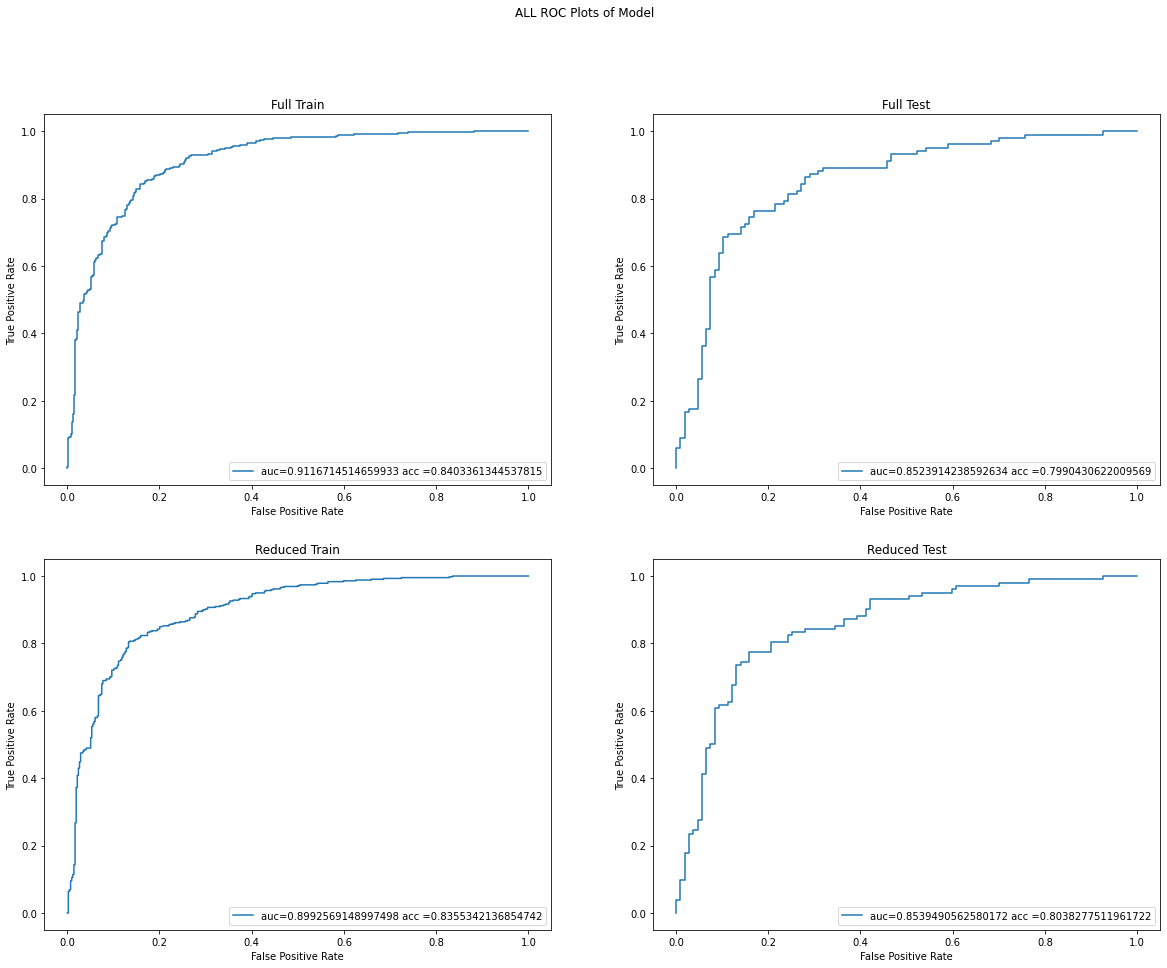

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('ALL ROC Plots of Model')
axs[0,0].plot(fpr1,tpr1,label="auc="+str(auc1)+" acc ="+str(a1))
axs[0,0].set_title('Full Train')

axs[0,1].plot(fpr2,tpr2,label="auc="+str(auc2)+" acc ="+str(a2))
axs[0,1].set_title('Full Test')

axs[1,0].plot(fpr3,tpr3,label="auc="+str(auc3)+" acc ="+str(a3))
axs[1,0].set_title('Reduced Train')

axs[1,1].plot(fpr4,tpr4,label="auc="+str(auc4)+" acc ="+str(a4))
axs[1,1].set_title('Reduced Test')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc=4)
plt.show()

While both the full and reduced model perform similarly, there is a slight overfit on the Full model as the validation accuracy for the reduced model is higher. Using the reduced model is preferable.

# LASSO Logistic Regression (Part B)

In [37]:
from sklearn.linear_model import LogisticRegressionCV

In [38]:
reg = LogisticRegressionCV(cv=10, penalty = "l1", solver = "liblinear").fit(X_train[X_train.columns], y_train)

## Report Lambda

In [39]:
reg.C_

array([21.5443469])

## Report Features

In [40]:
l = list(zip(reg.coef_[0], X_train.columns))

In [41]:
c = []
n = []
for coef, name in l:
    if coef != 0:
        c.append(coef)
        n.append(name)
        

In [42]:
list(zip(c, n))

[(-0.010117425310419542, 'age'),
 (-2.0386660727755458e-05, 'balance'),
 (0.015016819432001434, 'day'),
 (0.00518134933826388, 'duration'),
 (-0.13167019193244855, 'campaign'),
 (-0.0021162442230046236, 'pdays'),
 (-0.11861654242569207, 'previous'),
 (0.3122907679286678, 'job_admin.'),
 (-0.7533859183643408, 'job_blue-collar'),
 (0.5211992328607127, 'job_entrepreneur'),
 (-0.253060730010148, 'job_housemaid'),
 (0.6625152208766508, 'job_retired'),
 (-0.33437713149748677, 'job_self-employed'),
 (-0.6213660243623368, 'job_services'),
 (0.1898068657980634, 'job_student'),
 (-0.2241391859925121, 'job_technician'),
 (-1.9736604975256615, 'job_unemployed'),
 (1.4323530161185205, 'job_unknown'),
 (0.37812248908384694, 'marital_divorced'),
 (-0.006926980711926437, 'marital_single'),
 (-0.11797469330076193, 'education_secondary'),
 (0.08802403774765431, 'education_tertiary'),
 (-0.3530601231820105, 'education_unknown'),
 (-0.15650143177676587, 'default_no'),
 (0.7608620291597493, 'default_yes'),

Lasso regression keept a lot more of the features compared to the manual feature selection in Logistic Regression. Rather than removing all insignificant features, lasso scaled down each of the features and the ones that scaled to 0 were removed from the model.

## AUC ROC

In [43]:
y1 = reg.predict(X_train)
y2 = reg.predict(X_test)

In [44]:
a1 = 0
a2 = 0
for t in np.linspace(0,1,101):
    y_pred1 = np.where(y1>t, 1, 0)
    if accuracy_score(y_train, y_pred1) > a1:
        a1 = accuracy_score(y_train, y_pred1)
for t in np.linspace(0,1,101):
    y_pred2 = np.where(y2>t, 1, 0)
    if accuracy_score(y_test, y_pred2) > a2:
        a2 = accuracy_score(y_test, y_pred2)

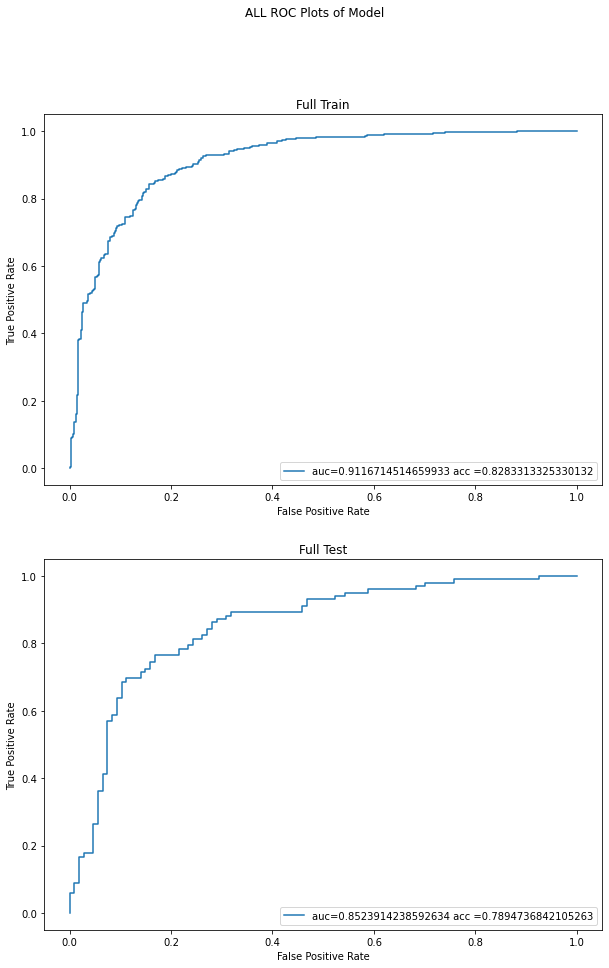

In [45]:
fig, axs = plt.subplots(2, figsize=(10, 15))
fig.suptitle('ALL ROC Plots of Model')
axs[0].plot(fpr1,tpr1,label="auc="+str(auc1)+" acc ="+str(a1))
axs[0].set_title('Full Train')

axs[1].plot(fpr2,tpr2,label="auc="+str(auc2)+" acc ="+str(a2))
axs[1].set_title('Full Test')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc=4)
plt.show()